## Example of converting small model from snntorch to Nir and from Niro to Norse

In [2]:
!pip install matplotlib

In [3]:
!pip install nirtorch

In [4]:
!pip install norse

In [5]:
!pip install snntorch

In [56]:
import snntorch as snn
import torch
from snntorch.export_nir import export_to_nir
from snntorch import surrogate
import norse

spike_grad = surrogate.fast_sigmoid()

# Simple model on snntorch
lif1 = snn.Leaky(beta=0.9, init_hidden=True, spike_grad=spike_grad)
lif2 = snn.Leaky(beta=0.9, init_hidden=True, output=True, spike_grad=spike_grad)

net = torch.nn.Sequential(
    torch.nn.Flatten(),  # Flattening input from [B, 28, 28] to [B, 784]
    torch.nn.Linear(6422528, 500),
    lif1,
    torch.nn.Linear(500, 10),
    lif2
)

# Example of a sample data
sample_data = torch.randn(1, 6422528)  # Assuming B=1, and each image is flattened to 784 features

# Ensure that the input is in the correct shape: (B, 784)
sample_data = sample_data.view(-1, 6422528)  # This flattens it to (1, 784), which is correct for the model

# Converting to NIR
nir_graph = export_to_nir(net, sample_data)

# Generate Norse model from the NIR graph
norse_model = norse.torch.from_nir(nir_graph)


Please read the Norse documentation for more information.
This warning can be turned off by setting from_nir(..., ignore_warnings=True)

Please read the Norse documentation for more information.
This warning can be turned off by setting from_nir(..., ignore_warnings=True)



In [7]:
nir_graph.nodes

{'input': Input(input_type={'input': array([  1, 784])}),
 '0': Flatten(input_type={'input': None}, start_dim=0, end_dim=-1, output_type={'output': None}, metadata={}),
 '1': Affine(weight=array([[-0.03015125, -0.0162955 ,  0.00062924, ..., -0.00728388,
          0.02867826, -0.03169873],
        [-0.02888697, -0.01836348,  0.00819013, ...,  0.03095174,
         -0.02070382, -0.020796  ],
        [-0.03316863, -0.00866291, -0.02298806, ...,  0.01348705,
         -0.01380204, -0.02728877],
        ...,
        [ 0.02074246,  0.02531577,  0.00309752, ...,  0.00941221,
          0.00413614,  0.01885561],
        [ 0.0150394 ,  0.006467  , -0.02241449, ..., -0.01184688,
          0.00136758, -0.00948241],
        [ 0.0354426 ,  0.03383478,  0.01096197, ...,  0.02133078,
         -0.02631692,  0.03227327]], shape=(500, 784), dtype=float32), bias=array([-6.47962978e-03,  2.73240469e-02,  2.92935763e-02,  2.07250379e-02,
         1.15043786e-03,  8.77495762e-03, -1.06463861e-02, -2.28983685e-

In [57]:
norse_model

GraphExecutor(
  (input): Identity()
  (0): Flatten(start_dim=0, end_dim=-1)
  (1): Linear(in_features=6422528, out_features=500, bias=True)
  (2): LIFBoxCell(p=LIFBoxParameters(tau_mem_inv=tensor(1000.0003), v_leak=tensor(0.), v_th=tensor(1.), v_reset=tensor(0.), method='super', alpha=tensor(100.), reset_method=<function reset_value at 0x113ab94e0>), dt=0.001)
  (3): Linear(in_features=500, out_features=10, bias=True)
  (4): LIFBoxCell(p=LIFBoxParameters(tau_mem_inv=tensor(1000.0003), v_leak=tensor(0.), v_th=tensor(1.), v_reset=tensor(0.), method='super', alpha=tensor(100.), reset_method=<function reset_value at 0x113ab94e0>), dt=0.001)
  (output): Identity()
)

In [9]:
x = torch.rand(1,784)

output_spikes, output_membrane = norse_model(x)

output_spikes, output_membrane = net(x)

print("Output Spikes:", output_spikes)
print("Output Membrane Potential:", output_membrane)

Output Spikes: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], grad_fn=<MulBackward0>)
Output Membrane Potential: tensor([[-0.0426, -0.2665, -0.0382, -0.0012,  0.0815,  0.0659,  0.1350, -0.2988,
          0.2377,  0.0261]], grad_fn=<SubBackward0>)


## Downloading and visualising NMNIST

In [10]:
import torchvision
import torch

BATCH_SIZE = 256

transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

train_data = torchvision.datasets.MNIST(
    root=".",
    train=True,
    download=True,
    transform=transform,
)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=BATCH_SIZE, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        root=".",
        train=False,
        transform=transform,
    ),
    batch_size=BATCH_SIZE,
)

0


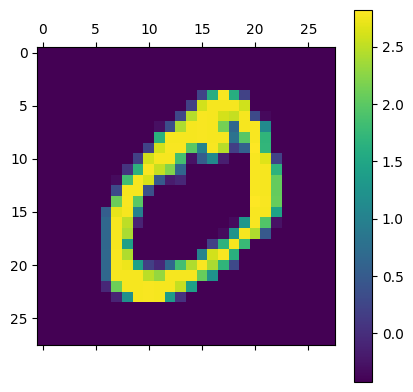

In [11]:
import matplotlib.pyplot as plt

img, label = train_data[1]

plt.matshow(img[0])
plt.colorbar()
print(label)

In [12]:
from norse.torch.module.lif import LIFRecurrentCell

In [13]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [14]:
norse_model

GraphExecutor(
  (input): Identity()
  (0): Flatten(start_dim=0, end_dim=-1)
  (1): Linear(in_features=784, out_features=500, bias=True)
  (2): LIFBoxCell(p=LIFBoxParameters(tau_mem_inv=tensor(1000.0003), v_leak=tensor(0.), v_th=tensor(1.), v_reset=tensor(0.), method='super', alpha=tensor(100.), reset_method=<function reset_value at 0x113ab94e0>), dt=0.001)
  (3): Linear(in_features=500, out_features=10, bias=True)
  (4): LIFBoxCell(p=LIFBoxParameters(tau_mem_inv=tensor(1000.0003), v_leak=tensor(0.), v_th=tensor(1.), v_reset=tensor(0.), method='super', alpha=tensor(100.), reset_method=<function reset_value at 0x113ab94e0>), dt=0.001)
  (output): Identity()
)

In [34]:
snn=norse_model

In [54]:
class Model(torch.nn.Module):
    def __init__(self, encoder, snn, decoder):
        super(Model, self).__init__()
        self.encoder = encoder
        self.snn = snn
        self.decoder = decoder

    def forward(self, x):
        x = self.encoder(x)
        x = self.snn(x)
        log_p_y = self.decoder(x)
        return log_p_y  

In [16]:
m = LIFRecurrentCell(input_size=200, hidden_size=100)

In [17]:
class ParametrizedLIFRecurrentCell(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(ParametrizedLIFRecurrentCell, self).__init__()
        self.tau_mem_inv = torch.nn.Parameter(norse.torch.functional.lif.LIFParameters().tau_mem_inv + 20*torch.randn(hidden_size))
        self.v_th = torch.nn.Parameter(0.5 + 0.1 * torch.randn(hidden_size))
        self.cell = norse.torch.module.lif.LIFRecurrentCell(input_size=input_size, hidden_size=hidden_size, 
                                                        p = norse.torch.functional.lif.LIFParameters(
                                                            tau_mem_inv = self.tau_mem_inv,
                                                            v_th = self.v_th,
                                                            alpha = 100,
                                                        )
                                                        
        )

    def forward(self, x, s = None):
        return self.cell(x, s)

In [18]:
from tqdm.notebook import tqdm, trange

def train(model, device, train_loader, optimizer, epoch, max_epochs):
    model.train()
    losses = []

    for (data, target) in tqdm(train_loader, leave=False):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = torch.nn.functional.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    mean_loss = np.mean(losses)
    return losses, mean_loss

In [19]:
def test(model, device, test_loader, epoch):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += torch.nn.functional.nll_loss(
                output, target, reduction="sum"
            ).item()  # sum up batch loss
            pred = output.argmax(
                dim=1, keepdim=True
            )  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    accuracy = 100.0 * correct / len(test_loader.dataset)

    return test_loss, accuracy

In [20]:
from norse.torch import ConstantCurrentLIFEncoder

def decode(x):
    x, _ = torch.max(x, 0)
    log_p_y = torch.nn.functional.log_softmax(x, dim=1)
    return log_p_y


T = 32
LR = 0.002
INPUT_FEATURES = 28*28
HIDDEN_FEATURES = 100
OUTPUT_FEATURES = 10
EPOCHS = 5

if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
else:
    DEVICE = torch.device("cpu")

In [21]:
def run_training(model, optimizer, epochs = EPOCHS):
    training_losses = []
    mean_losses = []
    test_losses = []
    accuracies = []

    torch.autograd.set_detect_anomaly(True)

    for epoch in trange(epochs):
        training_loss, mean_loss = train(model, DEVICE, train_loader, optimizer, epoch, max_epochs=EPOCHS)
        test_loss, accuracy = test(model, DEVICE, test_loader, epoch)
        training_losses += training_loss
        mean_losses.append(mean_loss)
        test_losses.append(test_loss)
        accuracies.append(accuracy)

    print(f"final accuracy: {accuracies[-1]}")
    return model

In [60]:
model = Model(
    encoder=ConstantCurrentLIFEncoder(
      seq_length=T,
    ),
    snn=norse_model,  # <-- no parentheses or parameters
    decoder=decode).to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [32]:
tau_mem_inv_before = model.snn.cell.cell.p.tau_mem_inv.cpu().detach().numpy()
v_th_before = model.snn.cell.cell.p.v_th.cpu().detach().numpy()

AttributeError: 'GraphExecutor' object has no attribute 'cell'

In [24]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [ ]:
model_after = run_training(model, optimizer, epochs=10)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

TypeError: max() received an invalid combination of arguments - got (tuple, int), but expected one of:
 * (Tensor input, *, Tensor out = None)
 * (Tensor input, Tensor other, *, Tensor out = None)
 * (Tensor input, int dim, bool keepdim = False, *, tuple of Tensors out = None)
 * (Tensor input, name dim, bool keepdim = False, *, tuple of Tensors out = None)


In [ ]:
counts, bins = np.histogram(tau_mem_inv_before)
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(bins[:-1], bins, weights=counts, histtype='step', label='before')
counts, bins = np.histogram(tau_mem_inv_after)
ax.hist(bins[:-1], bins, weights=counts, histtype='step', label='after')
ax.set_xlabel('$\\tau_{m}^{-1}$ [ms]')
ax.legend()